# Métodos Computacionales


## Unidad 3: 

### Ecuaciones diferenciales
- EDO Simbólico
- Metodo de Euler
- Método de Verlet
- Runge-kuta


## Introducción

Las ecuaciones diferenciales son sin duda una de las ramas más útiles de las matemáticas en la ciencia. Se utilizan para modelar problemas que implican el cambio de una variable con respecto a otra. Las ecuaciones diferenciales cubren una amplia gama de aplicaciones diferentes, que van desde ecuaciones diferenciales ordinarias (EDO) hasta problemas de valor límite que involucran muchas variables. En aras de la simplicidad, a lo largo de esta sección cubriremos solo los sistemas EDO, ya que son más elementales e igualmente útiles. Primero, cubriremos los métodos de primer orden, luego los métodos de segundo orden y finalmente, el sistema de ecuaciones diferenciales.

Las ecuaciones diferenciales ordinarias normalmente implican la solución de un problema de valor inicial, es decir, la solución tiene que satisfacer la ecuación diferencial junto con alguna condición inicial. Los problemas de la vida real generalmente implican problemas muy complicados e incluso no solubles, lo que hace inviable cualquier aproximación analítica. Afortunadamente, hay dos formas de manejar esto. Primero, para casi todas las situaciones, generalmente es posible simplificar el problema original y obtener uno más simple que pueda resolverse fácilmente. Luego, utilizando la teoría de la perturbación, podemos perturbar esta solución para aproximarnos a la real. Este enfoque es útil, sin embargo, depende mucho del problema específico y un estudio sistemático es bastante complicado.

La segunda aproximación, y la utilizada aquí, consiste en una reducción numérica completa del problema, resolviéndolo exactamente dentro de la precisión permitida por los errores implícitos de los métodos. Para esta parte, vamos a asumir problemas bien definidos, donde se espera que las soluciones se comporten bien.

## Cálculo Simbólico

## Máquina de Atwood

La longitud de la cuerda en la polea de radio $R$ estará compuesta por:

$$ x+y+\pi R = l \quad \rightarrow \quad y = -x + \pi R-l$$
Entonces obtenemos:
$$ \dot{y} = - \dot{x} $$

Siendo $x$ e $y$, longitudes de las cuerdas de $m_1$ y $m_2$.


 ![Img1.png](attachment:Img1.png)

### Solución simbólica 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import sympy as sym

#notacion punto
import sympy.physics.mechanics as mech
mech.init_vprinting()

Estableciendo constantes:

In [2]:
R,m1,m2,g,L=sym.symbols('R,m_1,m_2,g,L', positive=True)

t=sym.symbols('t')

x=sym.Function('x')

y=-x(t)+ (L-sym.pi*R)

Definiendo energías:

In [3]:
# Energía cinética (T)
# x.diff(t), y.diff(t) : velocidades
T=sym.Rational(1,2)*m1*(x(t).diff(t)**2) + sym.Rational(1,2)*m2* (y.diff(t)**2)
T#.simplify()

In [4]:
# Energía potencial (U)

U= -m1*g*x(t) - m2*g*y
U#.simplify()

In [5]:
Lagr= T-U
Lagr#.simplify()

Obteniendo así el Lagrangiano de la forma: $L(t,x,\dot x) $

$$ \frac{\partial L}{\partial x} $$

In [6]:
rhs=Lagr.diff(x(t))
rhs

In [7]:
lhs= Lagr.diff(x(t).diff(t)).diff(t)
lhs

**Euler-Lagrange equation**:

$$ \frac{d}{dt} \left( \frac{\partial L}{\partial \dot x} \right) - \frac{\partial L}{\partial x} = 0$$

In [8]:
E_L=sym.Eq(lhs,rhs)
E_L

**Finalmente resolvemos la ecuación diferencial:**
$$\ddot{x}=\frac{g(m_1-m_2)}{(m_1+m_2)}$$

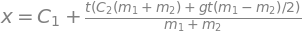

In [9]:
g_pos = sym.dsolve(E_L) #posición general
g_pos

**Reemplazando valores iniciales**

$$x(0)=0, \qquad \left.\frac{dx}{dt}\right|_0=0$$

In [10]:
ics={x(0): 0, sym.diff(x(t), t).subs(t,0): 0}

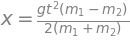

In [11]:
pos_eq = sym.dsolve(E_L,ics=ics) # reemplazsando condiciones iniciales
pos_eq #ecuación de posición

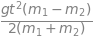

In [12]:
pos= pos_eq.rhs #solo la parte derecha
pos

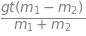

In [13]:
vel=pos.diff(t)
vel

**Reemplazando valores numéricos**

$$m_1=10, \quad m_2=5, \quad g=9.8$$

In [14]:
pos= pos.subs([(g,9.8),(m1,10),(m2,5)])
pos

In [15]:
#pasar de simbolica a numerica
np_pos=sym.lambdify(t,pos,'numpy')

Text(0.5, 1.0, 'Máquina de Atwood - m1= 10Kg , m2=5kg, g=9.8')

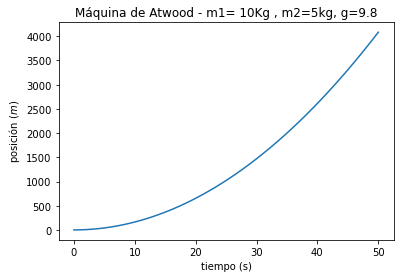

In [16]:
tt=np.linspace(0,50)
pos_numpy=np_pos(tt)
plt.plot(tt,pos_numpy)

plt.xlabel('tiempo (s)')
plt.ylabel('posición $(m)$')
plt.title('Máquina de Atwood - m1= 10Kg , m2=5kg, g=9.8')

## Método de Euler

### Problema bien planteado

El problema de valor inicial:

$$\frac{dy}{dt}=f(t,y), \qquad a\leq t\leq b, \qquad y(a)=\alpha,$$

Se dice que es un **problema bien planteado** si:



1.   Existe una única, y(t), y
2.   Existen constante $\epsilon \gt 0$ y $k \gt 0$, tales que para cualquier $\epsilon$ en $(0,\epsilon_0)$, siempre que $\delta(t)$ es continua con $|\delta(t)|\lt \epsilon$ para todo t en $[a,b]$ y cuando $|\delta_0|\lt \epsilon$, el problema de valor inicial

$$\frac{dz}{dt}=f(t,z)+\delta(t), \qquad a \leq t \leq b, \qquad z(a)  =\alpha + \delta_0 $$

tiene una única solución $z(t)$ que satisfac e

$$|z(t)-y(t)|\lt k\epsilon$$

para todo $t$ en $[a,b]$.


### Método

No se obtendrá una aproximación continua a la solución $y(t)$; en su lugar, las aproximaciones se generarán para varios valores llamados **puntos de malla** en el intervalo $[a,b]$.

Una vez que se obtiene la solución aproximada en los puntos, la solución aproximada en otros puntos en el intervalo se puede encontrar a través de interpolación.

primero estipulamos que los puntos de ma ya están Igualmente espaciados a lo largo del intervalo $[a,b]$. Esta copndición se garantiza al seleccionar un entero positivo $N$, al establecer $h=(b-a)/N$, y seleccionar los puntos de malla

$$t_i=a+ih, \qquad i=0,1,2,..,N.$$

Usaremos el teorema de Taylor para deducir el método de Euler para deducir el método de Euler. Suponga que $y(t)$, la única solución, tiene dos derivada continuas en $[a,b]$, de tal forma que cada $i=0,1,2,...,N-1$.

$$y(t_ {i+1})=y(t_i)+(t_{i+1}-t_i)y'(t_i)+\frac{(t_{i+1}-t_i)^2}{2}y''(\xi_i),$$

y ya que $y(t)$ satisface la ecuación (1).

$$y(t_{i+1})=y(t_i)+hf(t_i,y(t_i))+\frac{h^2}{2}y''(\xi_i)$$

El método de Euler es 

$$w_0=\alpha$$

$$w_{i+1}=w_i +hf(t_i,w_i), \qquad i =0,1,...,N-1$$

In [17]:
def euler(f,x0,xn,n,y0):
    
    h=(xn-x0)/n
    x0_l=[]
    yn_l=[]
    
    for i in range(n):
        slope=f(x0,y0)
        yn=y0+h*slope
        y0=yn
        x0=x0+h
        x0_l.append(x0)
        yn_l.append(yn)
    
    return x0_l, yn_l

**Problema ejemplo: Ley de enfriamiento de Newton**

Ley que describe como un objeto con una temperatura inicial  $T(t_0)=T_0$ es enfriado en una temperatura ambiente $T_R$

$$\frac{dT(t)}{dt}=-k\Delta T =-k(T(t)-T_R)$$

$\frac{dT(t)}{dt}$ nos dice la taza de enfriamiento de un objeto es proporcional a la diferencia de temperaturas.

Cuya solución analítica es: 

$$T(t)=T_R+(T(0)-T_R)e^{-kt}$$

In [18]:
Tr,t,k,T0=sym.symbols('Tr,t,k,T0')
Tt=sym.Function('T')
dTdt=Tt(t).diff(t)
exp=sym.Eq(dTdt,-k*(Tt(t)-Tr))
exp

In [19]:
sym.dsolve(exp)

In [20]:
ics2={Tt(0):T0}
Eq_sol=sym.dsolve(exp,ics=ics2)
Eq_sol

In [21]:
#k=0.07
def newton(time,temp):
    return -0.07*(temp-20)

def newton_ana(t,Tr=20,T0=100,k=0.07):
    return Tr+(T0-Tr)*np.exp(-k*t)

In [22]:
a=0
b=100
N1=10
N2=100
h1=(b-a)/N1
h2=(b-a)/N2

t_T=np.linspace(a,b,N2)
Tem=euler(newton,a,b,100,N2)
Tem_ana=newton_ana(t_T)

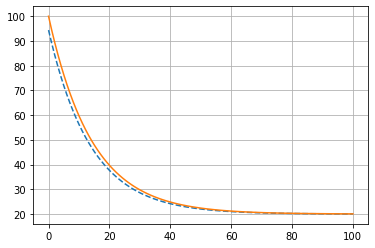

In [23]:
fig=plt.figure()

plt.plot(t_T,Tem,'--')
plt.plot(t_T,Tem_ana)

plt.grid()
plt.show()

## Método de Verlet

El problema de valor inicial (de segundo orden):

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y'' = F(y) \\
		 y(0) = \alpha \\
         y'(0) = \beta
	       \end{array}
	     \right.
\end{equation}

se discretiza de manera similar al método de Euler y luego se aplica el siguiente algoritmo (*la deducción de este algoritmo se realiza truncando series de Taylor hacia adelante y hacia atras de $F(y)$*):

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y_0 = \alpha \\
		 y_{-1} = y_0 - \beta \Delta x + \frac{1}{2}F(y_0)\Delta x^2 \\
         y_{i+1} = 2 y_i -y_{i-1} + F(y_i)\Delta x^2
	       \end{array}
	     \right.
\end{equation}

In [24]:
def verlet(f,a,b,xf,ninter):
    dx=xf/(ninter-1)
    xs=np.arenge(0,xf+dx,dx)
    ys=np.zeros(np.size(xs))
    
    yinit=a-dx*b+0.5*dx*dx*f(a)
    ys[0]=yinit
    ys[1]=a
    for i in range(1,ninter-1):
        ys[i+1]=2*y[i]-y[i-1]+f(y[i])*pow(dx,2)
    
    return xs,ys

## Métodos de alto orden

Aunque los esquemas de primer orden como el método de Euler son ilustrativos y permiten una buena comprensión del problema numérico, las aplicaciones reales no pueden tratarse con ellos, sino que deben invocarse métodos más precisos y precisos de alto orden. En esta sección cubriremos una conocida familia de integradores numéricos, los métodos Runge-Kutta.

### Métodos de Runge-Kutta 

Los métodos de Runge-Kutta (RK) son un conjunto de métodos iterativos (implícitos y explícitos) para la aproximación de soluciones de ecuaciones diferenciales ordinarias, concretamente, del problema de valor inicial.

Sean:

$$ y'(t)=f(t,y(t))$$


Entonces el método RK (de orden s) tiene la siguiente expresión, en su forma más general:

$${\displaystyle y_{n+1}=y_{n}+h\,\sum _{i=1}^{s}b_{i}k_{i}} \qquad \qquad (1)$$


donde h es el paso por iteración, o lo que es lo mismo, el incremento ${\displaystyle \Delta t_{n}}$ entre los sucesivos puntos ${\displaystyle t_{n}}$ y ${\displaystyle t_{n+1}}$. Los coeficientes ${\displaystyle k_{i}}$ son términos de aproximación intermedios, evaluados en ƒ de manera local

$${\displaystyle k_{i}=f\left(t_{n}+h\,c_{i}\,,y_{n}+h\,\sum _{j=1}^{s}a_{ij}k_{j}\right)\quad i=1,...,s.} \qquad \qquad (2)$$

con ${\displaystyle a_{ij},b_{i},c_{i}}$ coeficientes propios del esquema numérico elegido, dependiente de la regla de cuadratura utilizada. Los esquemas Runge-Kutta pueden ser explícitos o implícitos dependiendo de las constantes ${\displaystyle a_{ij}}$ del esquema. Si esta matriz es triangular inferior con todos los elementos de la diagonal principal iguales a cero; es decir, ${\displaystyle a_{ij}=0}$ para ${\displaystyle j=i,...,s}$, los esquemas son explícitos.

### Método Runge-Kutta de segundo orden


De (1) y (2), para s=2, obtenemos el método de Runge-Kutta de orden 2 (RK2):

$$ y_{n+1}=y_n+K2+O(h^3)$$

$$ K_1= h f(x_n,y_n) $$

$$ K_2= h f((x_n +h/2),(y_n+ \frac{1}{2}hK_1))$$

La fórmula básicamente calcula el siguiente valor yn + 1 usando yn actual más el promedio ponderado de dos incrementos:


*   $K_1$ es el incremento basado en la pendiente al comienzo del intervalo, usando $y$.
*   $K_2$ es el incremento basado en la pendiente en el punto medio del intervalo, usando $(y + h K1 / 2)$.

El método es un método de segundo orden, lo que significa que el error de truncamiento local es del orden de $O (h^3)$, mientras que el error acumulado total es de orden $O (h^4)$.

A continuación se muestra la implementación de RK2:

In [ ]:
def rk2(f,a,b,y0,n):
    h=(b-a)/n
    y=y0
    
    for i in range(1,n+1):
        k1=h*f(a,y)
        k2=h*f(a+0.5*h,y+0.5*h*k1)
        
        y=y+(1.0/6.0)*(k1+2*k2)
        a=a+h
    return y

**Problema ejemplo:** 
\begin{equation}
\left\{
	       \begin{array}{ll}
		 \frac{dy}{dx}=x+y-2 \\
		 y(0) = 1
	       \end{array}
	     \right.
\end{equation}

In [ ]:
def dydx(x,y):
    return (x+y-2)

a=0
b=3
y0=1
n=10000

print(rk2(dydx,a,b,y0,n))

1.4815330703425391


### 1.2 RK de orden 4 (RK4)

De (1) y (2), para s=4, obtenemos el método de RK4:

\begin{equation}
\left\{
	       \begin{array}{ll}
		 x_{i+1} = x_i +\Delta x \\
		 y_{i+1} = y_i + \frac{\Delta x}{6} \left( K_1 + 2K_2 +2 K_3 +K_4 \right)
	       \end{array}
	     \right.
\end{equation}

donde: 

\begin{equation}
\left\{
	       \begin{array}{ll}
		 K_1 = f(x_i,y_i) \\
		 K_2 = f\left( x_i + \frac{\Delta x}{2},y_i + \frac{\Delta x}{2} K_1\right) \\
         K_3 = f\left( x_i + \frac{\Delta x}{2},y_i + \frac{\Delta x}{2} K_2\right) \\
         K_4 = f(x_i +\Delta x,y_i +\Delta x K_3)
	       \end{array}
	     \right.
\end{equation}

De aqui vemos que el método RK4 toma una mejor estimacion de la pendiente, ya que (dado un intervalo $[x_i,x_{i+1}]$) considera un promedio ponderado de la pendiente en el extremo izquierdo $K_1$, dos pendientes mejoradas en el punto medio $K_2$ y $K_3$ y una pendiente en el extremo derecho $K_4$. 

In [ ]:
def rk4(f,a,b,y0,n):
    x=np.zeros(n+1)
    y=np.zeros(n+1)
    h=(b-a)/n
    
    x[0]=a
    y[0]=y0
    
    for i in range(n):
        
        x[i+1]=x[i]+h
        
        k1=f(x[i],y[i])
        k2=f(x[i]+0.5*h,y[i]+0.5*h*k1)
        k3=f(x[i]+0.5*h,y[i]+0.5*h*k2)
        k4=f(x[i]+h,y[i]+h*k3)
        
        y[i+1]=y[i]+(h/6.0)*(k1+2*k2+2*k3+k4)
        
    return x, y
        
        

**Problema ejemplo:**

\begin{equation}
\left\{
	       \begin{array}{ll}
		 y' = ty + t^3 \\
		 y(0) = 1
	       \end{array}
	     \right.
\end{equation}



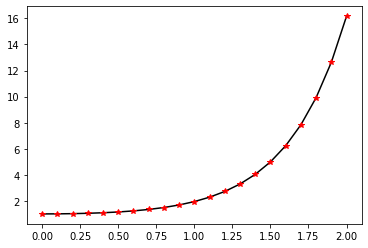

In [ ]:
def f(t,y):
    return(t*y+pow(t,3))

def exp_sol(t):
    return 3*np.exp(t*t/2.0)-t*t-2

a=0
b=2
n=20

xx,yy=rk4(f,a,b,1,n)

plt.plot(xx,exp_sol(xx),'k', label= 'ana')
plt.plot(xx,yy,'r*', label= 'numerica')

# Anexo

## Sistemas de EDOs

Generalmente, la mayoría de los problemas se presentan en la forma de sistemas de ecuaciones diferenciales ordinarias, es decir, que incluyen varias ecuaciones a resolver. 

Para ver como podemos utilizar a integrate.odeint para resolver este tipo de problemas, consideremos el siguiente sistema de ecuaciones diferenciales ordinarias, conocido el atractor de Lorenz.

### **EL ATRACTOR DE LORENZ**

El atractor de Lorenz es un concepto introducido por Edward Lorenz en 1963. Se trata de un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.

Para ciertos valores de los parámetros $\rho, \sigma, \beta$, el sistema exhibe un comportamiento caótico y muestra lo que actualmente se llama un atractor extraño; esto fue probado por Warwick Tucker (2002). El atractor extraño en este caso es un fractal de dimensión de Hausdorff entre 2 y 3. Grassberger (1983) ha estimado la dimensión de Hausdorff en 2,06 ± 0,01 y la dimensión de correlación en 2,05 ± 0,01.

El sistema aparece en láseres, en generadores eléctricos y en determinadas ruedas de agua.

\begin{align}
x'(t) &= \sigma(y-x)  \\
y'(t) &= x(\rho - z) - y \\
z'(t) & = xy - \beta z
\end{align}

donde $\sigma$ es llamado el número de Prandtl y $\rho$ se llama el número de Rayleigh.

usualmente $\rho=10$, $\beta=8/3$ y b es variado. El sistema exhibe un comportamiento caótico para $\rho=28$ pero muestra órbitas periódicas para otros valores de b; por ejemplo, con $\rho=99.96$ se convierte en un nudo tórico. La forma de mariposa del atractor de Lorenz puede haber inspirado el nombre del efecto mariposa en la teoría del caos.

Estas ecuaciones son conocidas por sus soluciones caóticas, que dependen sensiblemente de los valores de los parámetros $\rho, \sigma, \beta$. Veamos como podemos resolverlas con la ayuda de Python.